### Getting started with Pyaerocom

This notebook gives an introduction on how to install Pyaerocom and run it on your local machine. 

#### Requirements

Before installation please make sure you have all required dependencies installed ([see here for a list of dependencies](http://aerocom.met.no/pyaerocom/readme.html#requirements)).

#### Installation

Please download and unzip the [Pyaerocom GitHub repository](https://github.com/metno/pyaerocom) or clone it using 

``$ git clone https://github.com/metno/pyaerocom.git``

into a local directory of your choice. Then, navigate into the Pyaerocom root directory where the setup.py file is located. Use

``$ python setup.py install``

to install the package normally or use 

``$ python setup.py develop``

to install the package in development mode. The latter leaves the code editable and while ``install`` installs and freezes the current version of the code in your Python environment ([see here](https://packaging.python.org/tutorials/distributing-packages/#working-in-development-mode) or [here](https://stackoverflow.com/questions/19048732/python-setup-py-develop-vs-install) for more info).

If everything worked out as expected, you should be able to import pyaerocom from within a Python3 console.

In [1]:
import pyaerocom
print("Installation base directory: %s" %pyaerocom.__dir__)
print("Version: %s" %pyaerocom.__version__)

Installation base directory: /home/jonasg/github/pyaerocom/pyaerocom
Version: 0.0.1.dev1


#### Setting global environment variables

The import of data from the AEROCOM database in Pyaerocom is controlled via an instance of the `IOConfig` class.

In [2]:
print("Current config: %s" %pyaerocom.config.short_str())

Current config: Pyaerocom IOConfig
GCOSPERCENTCRIT: 0.1
GCOSABSCRIT: 0.04
OBSNET_NONE: NONE
NOMODELNAME: OBSERVATIONS-ONLY
AERONET_SUN_V2L15_AOD_DAILY_NAME: AeronetSunV2Lev1.5.daily
AERONET_SUN_V2L15_AOD_ALL_POINTS_NAME: AeronetSun_2.0_NRT
AERONET_SUN_V2L2_AOD_DAILY_NAME: AeronetSunV2Lev2.daily
AERONET_SUN_V2L2_AOD_ALL_POINTS_NAME: AeronetSunV2Lev2.AP
AERONET_SUN_V2L2_SDA_DAILY_NAME: AeronetSDAV2Lev2.daily
AERONET_SUN_V2L2_SDA_ALL_POINTS_NAME: AeronetSDAV2Lev2.AP
AERONET_SUN_V3L15_AOD_DAILY_NAME: AeronetSunV3Lev1.5.daily
AERONET_SUN_V3L15_AOD_ALL_POINTS_NAME: AeronetSunV3Lev1.5.AP
AERONET_SUN_V3L2_AOD_DAILY_NAME: AeronetSunV3Lev2.daily
AERONET_SUN_V3L2_AOD_ALL_POINTS_NAME: AeronetSunV3Lev2.AP
AERONET_SUN_V3L2_SDA_DAILY_NAME: AeronetSDAV3Lev2.daily
AERONET_SUN_V3L2_SDA_ALL_POINTS_NAME: AeronetSDAV3Lev2.AP
AERONET_INV_V2L15_DAILY_NAME: AeronetInvV2Lev1.5.daily
AERONET_INV_V2L15_ALL_POINTS_NAME: AeronetInvV2Lev1.5.AP
AERONET_INV_V2L2_DAILY_NAME: AeronetInvV2Lev2.daily
AERONET_INV_V2L2_ALL

You can check if the relevant base directories `MODELBASEDIR` and `OBSBASEDIR` are valid.

In [3]:
print("All paths valid? %s" %pyaerocom.config.READY)

All paths valid? True


If you work on your local machine and use the external AEROCOM user server, you might need to change the path settings. Now you have several options to do this:

1. Change all relevant paths directly in the [paths.ini](https://github.com/metno/pyaerocom/blob/master/pyaeroco /data/paths.ini) file of your installation.
2. Create a new config file <myconfig.ini> and iniate your configuration in your Python console by calling ``pyaerocom.config = pyaerocom.IOConfig(config_file=<myconfig.ini>)``
3. Change the settings directly within the instance of the ``IOConfig`` class, as follows:

In [4]:
cfg = pyaerocom.config
cfg.MODELBASEDIR="path/that/does/not/exist"
cfg.OBSBASEDIR="path/that/does/not/exist"
print("All paths valid? %s" %cfg.READY)

All paths valid? False


See what's currently in there.

In [5]:
print("Current config: %s" %pyaerocom.config.short_str())

Current config: Pyaerocom IOConfig
GCOSPERCENTCRIT: 0.1
GCOSABSCRIT: 0.04
OBSNET_NONE: NONE
NOMODELNAME: OBSERVATIONS-ONLY
AERONET_SUN_V2L15_AOD_DAILY_NAME: AeronetSunV2Lev1.5.daily
AERONET_SUN_V2L15_AOD_ALL_POINTS_NAME: AeronetSun_2.0_NRT
AERONET_SUN_V2L2_AOD_DAILY_NAME: AeronetSunV2Lev2.daily
AERONET_SUN_V2L2_AOD_ALL_POINTS_NAME: AeronetSunV2Lev2.AP
AERONET_SUN_V2L2_SDA_DAILY_NAME: AeronetSDAV2Lev2.daily
AERONET_SUN_V2L2_SDA_ALL_POINTS_NAME: AeronetSDAV2Lev2.AP
AERONET_SUN_V3L15_AOD_DAILY_NAME: AeronetSunV3Lev1.5.daily
AERONET_SUN_V3L15_AOD_ALL_POINTS_NAME: AeronetSunV3Lev1.5.AP
AERONET_SUN_V3L2_AOD_DAILY_NAME: AeronetSunV3Lev2.daily
AERONET_SUN_V3L2_AOD_ALL_POINTS_NAME: AeronetSunV3Lev2.AP
AERONET_SUN_V3L2_SDA_DAILY_NAME: AeronetSDAV3Lev2.daily
AERONET_SUN_V3L2_SDA_ALL_POINTS_NAME: AeronetSDAV3Lev2.AP
AERONET_INV_V2L15_DAILY_NAME: AeronetInvV2Lev1.5.daily
AERONET_INV_V2L15_ALL_POINTS_NAME: AeronetInvV2Lev1.5.AP
AERONET_INV_V2L2_DAILY_NAME: AeronetInvV2Lev2.daily
AERONET_INV_V2L2_ALL

As you can see, `MODELBASEDIR` and `OBSBASEDIR` contain the invalid paths, but e.g. the list containing model directories (`MODELDIRS`) still has the original settings. This is because, these are written in the method ``load_config(config_file)`` or the wrapper method ``reload()`` which does the same.  Now reload of the config_file and print.

In [6]:
cfg.reload()
print("Current config: %s" %pyaerocom.config.short_str())

Current config: Pyaerocom IOConfig
GCOSPERCENTCRIT: 0.1
GCOSABSCRIT: 0.04
OBSNET_NONE: NONE
NOMODELNAME: OBSERVATIONS-ONLY
AERONET_SUN_V2L15_AOD_DAILY_NAME: AeronetSunV2Lev1.5.daily
AERONET_SUN_V2L15_AOD_ALL_POINTS_NAME: AeronetSun_2.0_NRT
AERONET_SUN_V2L2_AOD_DAILY_NAME: AeronetSunV2Lev2.daily
AERONET_SUN_V2L2_AOD_ALL_POINTS_NAME: AeronetSunV2Lev2.AP
AERONET_SUN_V2L2_SDA_DAILY_NAME: AeronetSDAV2Lev2.daily
AERONET_SUN_V2L2_SDA_ALL_POINTS_NAME: AeronetSDAV2Lev2.AP
AERONET_SUN_V3L15_AOD_DAILY_NAME: AeronetSunV3Lev1.5.daily
AERONET_SUN_V3L15_AOD_ALL_POINTS_NAME: AeronetSunV3Lev1.5.AP
AERONET_SUN_V3L2_AOD_DAILY_NAME: AeronetSunV3Lev2.daily
AERONET_SUN_V3L2_AOD_ALL_POINTS_NAME: AeronetSunV3Lev2.AP
AERONET_SUN_V3L2_SDA_DAILY_NAME: AeronetSDAV3Lev2.daily
AERONET_SUN_V3L2_SDA_ALL_POINTS_NAME: AeronetSDAV3Lev2.AP
AERONET_INV_V2L15_DAILY_NAME: AeronetInvV2Lev1.5.daily
AERONET_INV_V2L15_ALL_POINTS_NAME: AeronetInvV2Lev1.5.AP
AERONET_INV_V2L2_DAILY_NAME: AeronetInvV2Lev2.daily
AERONET_INV_V2L2_ALL

The ``reload`` (and ``load_config``) method actually checks if the currently defined base directories exist, and if not, it uses the ones that are defined in the paths.ini file. This is the why the above configuration is the intial one. If you choose valid paths, this should work.

In [7]:
cfg = pyaerocom.config
cfg.MODELBASEDIR="."
cfg.OBSBASEDIR="."
print("All paths valid? %s" %cfg.READY)
cfg.reload()
print("Current config: %s" %pyaerocom.config.short_str())

All paths valid? True
Current config: Pyaerocom IOConfig
GCOSPERCENTCRIT: 0.1
GCOSABSCRIT: 0.04
OBSNET_NONE: NONE
NOMODELNAME: OBSERVATIONS-ONLY
AERONET_SUN_V2L15_AOD_DAILY_NAME: AeronetSunV2Lev1.5.daily
AERONET_SUN_V2L15_AOD_ALL_POINTS_NAME: AeronetSun_2.0_NRT
AERONET_SUN_V2L2_AOD_DAILY_NAME: AeronetSunV2Lev2.daily
AERONET_SUN_V2L2_AOD_ALL_POINTS_NAME: AeronetSunV2Lev2.AP
AERONET_SUN_V2L2_SDA_DAILY_NAME: AeronetSDAV2Lev2.daily
AERONET_SUN_V2L2_SDA_ALL_POINTS_NAME: AeronetSDAV2Lev2.AP
AERONET_SUN_V3L15_AOD_DAILY_NAME: AeronetSunV3Lev1.5.daily
AERONET_SUN_V3L15_AOD_ALL_POINTS_NAME: AeronetSunV3Lev1.5.AP
AERONET_SUN_V3L2_AOD_DAILY_NAME: AeronetSunV3Lev2.daily
AERONET_SUN_V3L2_AOD_ALL_POINTS_NAME: AeronetSunV3Lev2.AP
AERONET_SUN_V3L2_SDA_DAILY_NAME: AeronetSDAV3Lev2.daily
AERONET_SUN_V3L2_SDA_ALL_POINTS_NAME: AeronetSDAV3Lev2.AP
AERONET_INV_V2L15_DAILY_NAME: AeronetInvV2Lev1.5.daily
AERONET_INV_V2L15_ALL_POINTS_NAME: AeronetInvV2Lev1.5.AP
AERONET_INV_V2L2_DAILY_NAME: AeronetInvV2Lev2.dail

#### Test import and plot some model data

Now that we have everything set up, we can start working on the data. In the following cells, we use the `ReadModelData` class to find and import data files containing the aerosol optical depth at 550 nm (`od550aer`) from the ECMWF CAMS reanalysis model (``ECMWF_CAMS_REAN``)for the years 2003-2007 in daily resolution. The files will be temporally merged and put into an instance of the ``ModelData`` instance. Starting with creating a reading object, that will take care of finding the model directory of us (based on the model ID) and all valid NetCDF files.

In [8]:
read = pyaerocom.io.ReadModelData(model_id="ECMWF_CAMS_REAN",
                                  start_time="1-1-2003",
                                  stop_time="31.12.2007", 
                                  verbose=True)

Searching dir for ID ECMWF_CAMS_REAN in: /lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/


Found: /lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN


At this point, nothing is actually imported but only the paths are set that contain data for this model. In order to read one variable, call the ``read_var`` function with a valid variable name. You can check available variables using the ``vars`` attribute.

In [9]:
print("Detected variables for model %s:\n %s" %(read.model_id, read.vars))

Detected variables for model ECMWF_CAMS_REAN:
 ['ang4487aer', 'od440aer', 'od550aer', 'od550bc', 'od550dust', 'od550oa', 'od550so4', 'od550ss', 'od865aer']


In [10]:
data = read.read_var(var_name="od550aer", ts_type="daily")

print("\nThe data object is of type %s and contains %d time stamps" %(type(data), data.shape[0]))

FOUND MATCH: ECMWF_CAMS_REAN.daily.od550aer.2003.nc
FOUND MATCH: ECMWF_CAMS_REAN.daily.od550aer.2004.nc
FOUND MATCH: ECMWF_CAMS_REAN.daily.od550aer.2005.nc
FOUND MATCH: ECMWF_CAMS_REAN.daily.od550aer.2006.nc
FOUND MATCH: ECMWF_CAMS_REAN.daily.od550aer.2007.nc
daily 2003
Invalid time dimension. Error message: AttributeError('Cube does not contain time dimension',)
Invalid time axis in file ECMWF_CAMS_REAN.daily.od550aer.2003.nc. Attempting to correct.
daily 2004
Invalid time dimension. Error message: AttributeError('Cube does not contain time dimension',)
Invalid time axis in file ECMWF_CAMS_REAN.daily.od550aer.2004.nc. Attempting to correct.
daily 2005
Invalid time dimension. Error message: AttributeError('Cube does not contain time dimension',)
Invalid time axis in file ECMWF_CAMS_REAN.daily.od550aer.2005.nc. Attempting to correct.
daily 2006
Invalid time dimension. Error message: AttributeError('Cube does not contain time dimension',)
Invalid time axis in file ECMWF_CAMS_REAN.daily.o

From the output we can see that based on our specified time range and temporal resolution, we got 6 netCDF files that were merged all into an instance of the `pyaerocom.ModelData` class, which will be introduced in more detail later. 

Now as a final step, we compute and plot a time series of the global weighted average aerosol optical density as well as the same time series at the coordinates in the ciry of Leipzig, Germany.

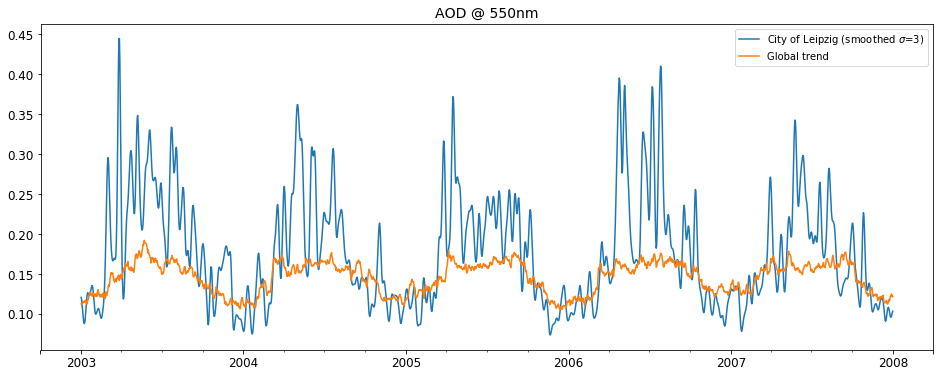

In [11]:
from pandas import Series
from scipy.ndimage import gaussian_filter1d
#compute global mean (area weighted)
glob_mean = data.area_weighted_mean()

#extract AODs at the position of Leipzig
lon_leipzig = 12.44
lat_leipzig = 51.35

data_leipzig = data.interpolate([("latitude", lat_leipzig), 
                                 ("longitude", lon_leipzig)])

# create pandas Series for global average
s_glob = Series(glob_mean, index=data.time_stamps())

# create pandas Series for leipzig average (and smooth in time)
GAUSS_SIGMA = 3
s_leipzig = Series(gaussian_filter1d(data_leipzig.grid.data, GAUSS_SIGMA), 
                   data_leipzig.time_stamps())

ax = s_leipzig.plot(label=r"City of Leipzig (smoothed $\sigma$=%d)" %GAUSS_SIGMA, figsize=(16,6))
s_glob.plot(label="Global trend", ax=ax)
ax.legend()
tit = ax.set_title("AOD @ 550nm")

In the following section, the `ReadMultiModelData` class is introduced, which is largely based on the `ReadModelData` class and allows for importing data from multiple models.